In [15]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv("titanic.csv")

data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
#chicking for missing values 
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [4]:
#filling and dropping missing values
data['Age'].fillna(data['Age'].mean(), inplace=True)
data.drop('Cabin', axis=1, inplace=True) #dropping 'Cabin' column due to many missing values

C:\Users\DELL\AppData\Local\Temp\ipykernel_2356\3663476822.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Age'].fillna(data['Age'].mean(), inplace=True)


In [5]:
data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

In [8]:
data["Embarked"].mode()[0]
data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)
data["Embarked"].isnull().sum()

0

In [12]:
#creating new features
data['FamilySize'] = data['SibSp'] + data['Parch'] + 1
data['IsAlone'] = (data['FamilySize'] == 1).astype(int)
data['Title'] = data['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
print(data.info())
print(data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    int64   
 1   Survived     891 non-null    int64   
 2   Pclass       891 non-null    int64   
 3   Name         891 non-null    object  
 4   Sex          891 non-null    object  
 5   Age          891 non-null    float64 
 6   SibSp        891 non-null    int64   
 7   Parch        891 non-null    int64   
 8   Ticket       891 non-null    object  
 9   Fare         891 non-null    float64 
 10  Embarked     891 non-null    object  
 11  FamilySize   891 non-null    int64   
 12  IsAlone      891 non-null    int32   
 13  Title        891 non-null    object  
 14  FareBin      891 non-null    category
 15  AgeBin       891 non-null    category
dtypes: category(2), float64(2), int32(1), int64(6), object(5)
memory usage: 96.2+ KB
None
       PassengerId    Survived

<>:4: SyntaxWarning: invalid escape sequence '\.'
<>:4: SyntaxWarning: invalid escape sequence '\.'
C:\Users\DELL\AppData\Local\Temp\ipykernel_2356\3797476023.py:4: SyntaxWarning: invalid escape sequence '\.'
  data['Title'] = data['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)


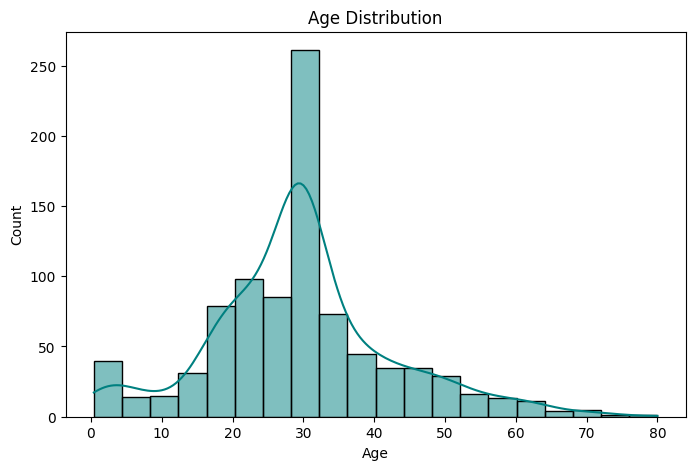

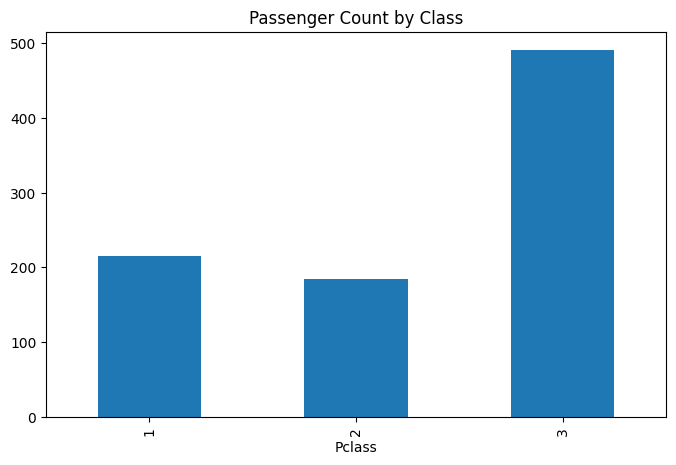

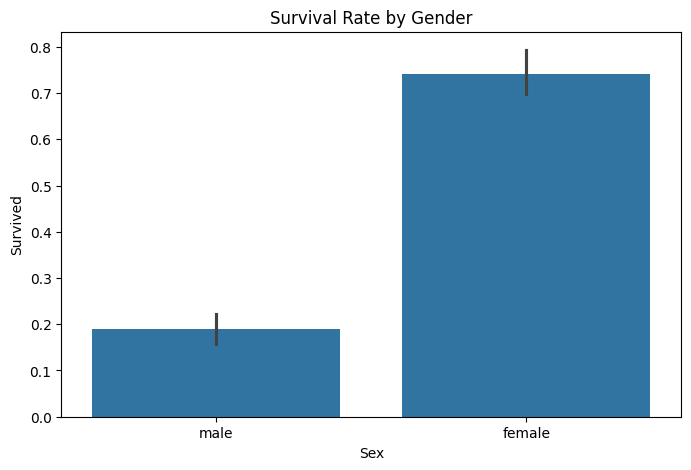

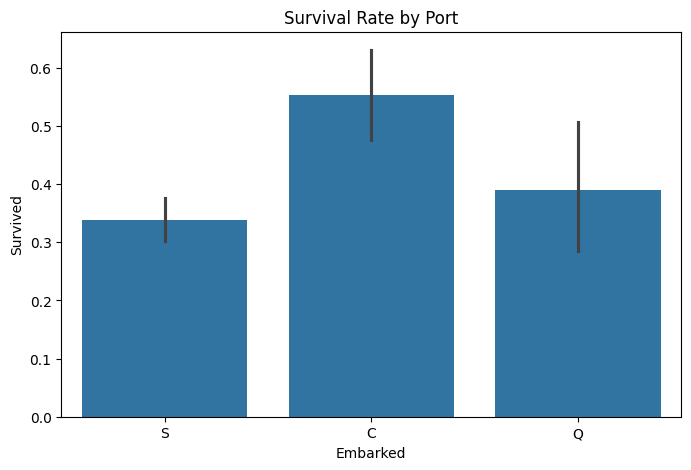

In [16]:
#VISUALIZATION
plt.figure(figsize=(8, 5))
sns.histplot(data['Age'], bins=20, kde=True, color='teal')
plt.title('Age Distribution')
plt.show()

plt.figure(figsize=(8, 5))
data['Pclass'].value_counts().sort_index().plot(kind='bar')
plt.title('Passenger Count by Class')
plt.show()

plt.figure(figsize=(8, 5))
sns.barplot(x='Sex', y='Survived', data=data)
plt.title('Survival Rate by Gender')
plt.show()

plt.figure(figsize=(8, 5))
sns.barplot(x='Embarked', y='Survived', data=data)
plt.title('Survival Rate by Port')
plt.show()



In [17]:
data.to_csv('titanic_cleaned.csv', index=False)